In [1]:
using Images
using ProgressMeter
using Statistics
using LinearAlgebra
using Plots

In [2]:
SPEC_DIR = "spectrograms"
GENRES = ["classical", "edm", "rock"]

3-element Array{String,1}:
 "classical"
 "edm"      
 "rock"     

PCA on frequency averages
=========================

Take the average amplitude per mel-frequency over the entire song and run PCA with frequencies as variables

In [3]:
A = zeros(367, 288)

367×288 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [4]:
counter = 1

for genre in GENRES
    println(genre)
    for (root, dir, files) in walkdir(joinpath(SPEC_DIR, genre))
        @showprogress for image in files
            if !occursin(".png", image) continue end
            if occursin("checkpoint", image) continue end
            
            im = channelview(Gray.(load(joinpath(SPEC_DIR, genre, image))))
            ra = [mean(im[i, :]) for i = 1:size(im)[1]]
            A[counter, :] = ra'
            global counter
            counter += 1
        end
    end
end

classical


Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


edm


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


rock


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [5]:
A_centered = [A[i, j] - mean(A[:, j]) for i=1:size(A)[1], j=1:size(A)[2]]

367×288 Array{Float64,2}:
 -0.100749    -0.100749    -0.100749    …   0.00590338   0.00590338
 -0.102982    -0.102982    -0.102982       -0.202212    -0.202212  
 -0.0808596   -0.0808596   -0.0808596      -0.100115    -0.100115  
 -0.0650463   -0.0650463   -0.0650463      -0.197982    -0.197982  
 -0.0996232   -0.0996232   -0.0996232      -0.0625607   -0.0625607 
 -0.08745     -0.08745     -0.08745     …  -0.129627    -0.129627  
 -0.102764    -0.102764    -0.102764       -0.18973     -0.18973   
 -0.098779    -0.098779    -0.098779       -0.107386    -0.107386  
 -0.101784    -0.101784    -0.101784       -0.122737    -0.122737  
 -0.102219    -0.102219    -0.102219       -0.361508    -0.361508  
 -0.100513    -0.100513    -0.100513    …  -0.170549    -0.170549  
 -0.0783814   -0.0783814   -0.0783814      -0.203174    -0.203174  
 -0.0777278   -0.0777278   -0.0777278      -0.0531743   -0.0531743 
  ⋮                                     ⋱                          
  0.0592184    0.05921

In [6]:
ColLength = [sqrt(sum(A_centered[i, j]^2 for i=1:size(A)[1])) for j=1:size(A)[2]]

288-element Array{Float64,1}:
 1.3630272613664094
 1.3630272613664094
 1.3630272613664094
 2.173582161547399 
 2.173582161547399 
 2.444972788274052 
 2.444972788274052 
 2.51097417508183  
 2.51097417508183  
 2.520274852074242 
 2.520274852074242 
 2.520274852074242 
 2.530216704462127 
 ⋮                 
 1.6463783981693414
 1.715825051758548 
 1.715825051758548 
 1.7248177231220216
 1.7248177231220216
 1.7248177231220216
 1.9639337439571094
 1.9639337439571094
 2.548006712969892 
 2.548006712969892 
 2.1372626507176378
 2.1372626507176378

In [7]:
B = [A_centered[i, j] / ColLength[j] for i=1:size(A)[1], j=1:size(A)[2]]

367×288 Array{Float64,2}:
 -0.0739155   -0.0739155   -0.0739155   …   0.00276212   0.00276212
 -0.0755539   -0.0755539   -0.0755539      -0.0946127   -0.0946127 
 -0.0593236   -0.0593236   -0.0593236      -0.0468427   -0.0468427 
 -0.0477219   -0.0477219   -0.0477219      -0.0926334   -0.0926334 
 -0.0730897   -0.0730897   -0.0730897      -0.0292714   -0.0292714 
 -0.0641587   -0.0641587   -0.0641587   …  -0.0606508   -0.0606508 
 -0.075394    -0.075394    -0.075394       -0.0887725   -0.0887725 
 -0.0724703   -0.0724703   -0.0724703      -0.0502448   -0.0502448 
 -0.0746748   -0.0746748   -0.0746748      -0.0574271   -0.0574271 
 -0.0749944   -0.0749944   -0.0749944      -0.169145    -0.169145  
 -0.0737424   -0.0737424   -0.0737424   …  -0.0797979   -0.0797979 
 -0.0575054   -0.0575054   -0.0575054      -0.0950629   -0.0950629 
 -0.0570259   -0.0570259   -0.0570259      -0.0248796   -0.0248796 
  ⋮                                     ⋱                          
  0.0434463    0.04344

In [8]:
U, sigma, V = svd(B, full=true)

SVD{Float64,Float64,Array{Float64,2}}([-0.05152592979354509 0.010950767032612219 … -0.011921311414853789 -0.005559645520363514; -0.10125851343601366 0.13273999352144755 … 0.031374260835352344 -0.034998530630195694; … ; -0.010938222089207618 0.016135847086522565 … 0.06463999278148834 -0.012443102216493465; 0.028612068231210975 0.003244830419389214 … -0.007479018780001385 0.041421645195630026], [15.082059422023365, 4.368098939012903, 2.9929931457229575, 2.2820400683941457, 1.9657370321860659, 1.9164710907814144, 1.5468006966691241, 1.4736788304218071, 1.409870199947708, 1.1740532888760766  …  1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15, 1.321404682747715e-15], [0.05797521169529004 0.05797521169528996 … 0.04048836020371804 0.04048836020371806; -0.060789478872804864 -0.06078947887280517 … -0.035344346982219485 -0.03534434698221954

In [9]:
y1 = B * V[:, 1]
y2 = B * V[:, 2]
y3 = B * V[:, 3]

367-element Array{Float64,1}:
 -0.15068702206654616 
  0.014627199786815655
  0.0365937657261286  
 -0.2791116882061703  
 -0.18721025228439603 
 -0.08809988824695511 
 -0.4116133004789611  
  0.2654851031199799  
 -0.24097332845440456 
 -0.061335435340798536
 -0.08188614670081143 
 -0.04407049789763792 
  0.00893812744037049 
  ⋮                   
 -0.14857511341875299 
  0.0560874939413394  
  0.18320366239363878 
  0.13846651889311665 
  0.17320386261921705 
 -0.03538042217464572 
 -0.11013473729328743 
 -0.01693832027275664 
  0.10954133475111649 
 -0.1446255497881851  
  0.3087612506640677  
  0.21516214493393304 

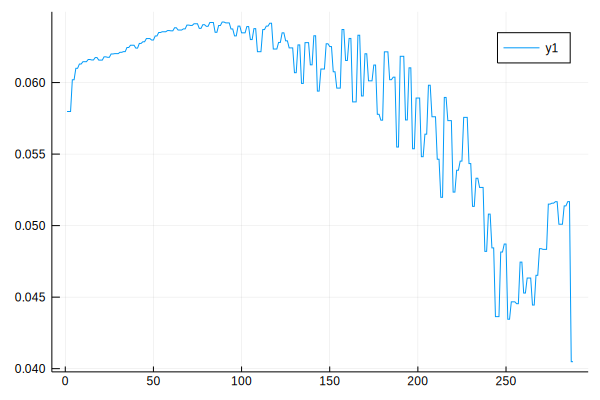

In [10]:
plot(V[:, 1])

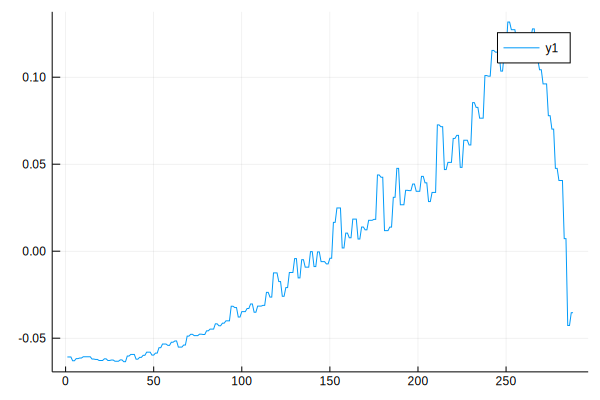

In [11]:
plot(V[:, 2])

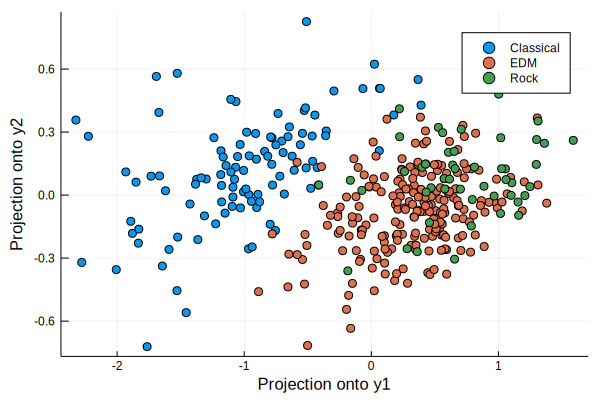

In [12]:
scatter(y1[1:103], y2[1:103], label="Classical")
scatter!(y1[104:104+216-1], y2[104:104+216-1], label="EDM")
scatter!(y1[104+216:size(y1)[1]], y2[104+216:size(y2)[1]], label="Rock")

xlabel!("Projection onto y1")
ylabel!("Projection onto y2")

In [13]:
mean(y1[1:103])

-1.0017484776941887

In [14]:
mean(y1[104:104+216-1])

0.3182858402136311

In [15]:
mean(y1[104+216:size(y1)[1]])

0.717298994090774

In [16]:
mean(y2[1:103])

0.11980376181489054

In [17]:
mean(y2[104:104+216-1])

-0.07567816209553409

In [18]:
mean(y2[104+216:size(y1)[1]])

0.08347282386878437

In [19]:
std(y2[1:103])

0.2612819047805414

In [20]:
std(y2[104:104+216-1])

0.18726373603641402

In [21]:
std(y2[104+216:size(y1)[1]])

0.1802773623273539

In [22]:
argmin(y1)

37

In [23]:
y1[37]

-2.324579381674341

In [24]:
argmax(y1)

338

In [25]:
y1[338]

1.5889577055966682

In [26]:
338-103-216

19

Things to analyze
-----------------
 - STDEV of v2 - treble
 - average projection onto v1 - bass amount

In [27]:
scatter(y1[1:103], y2[1:103], y3[1:103], aspect_ratio=:equal, label="Classical")
scatter!(y1[104:104+216-1], y2[104:104+216-1], y3[104:104+216-1], label="EDM")
scatter!(y1[104+216:size(y1)[1]], y2[104+216:size(y2)[1]], y3[104+216:size(y2)[1]], label="Rock")

savefig("test.png")

PCA on resized spectrogram
==========================

In [28]:
WIDTH = 20

20

In [29]:
A = zeros(367, 288 * WIDTH)

367×5760 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [30]:
counter = 1

for genre in GENRES
    println(genre)
    for (root, dir, files) in walkdir(joinpath(SPEC_DIR, genre))
        @showprogress for image in files
            if !occursin(".png", image) continue end
            if occursin("checkpoint", image) continue end
            
            ra = reshape(channelview(Gray.(imresize(load(joinpath(SPEC_DIR, genre, image)), (288, WIDTH)))), 1, 288 * WIDTH)
            A[counter, :] = ra'
            global counter
            counter += 1
        end
    end
end

classical


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


edm


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


rock


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [31]:
A_centered = [A[i, j] - mean(A[:, j]) for i=1:size(A)[1], j=1:size(A)[2]]

367×5760 Array{Float64,2}:
 -0.0267244   -0.0267244   …  -0.225538    -0.119111   -0.119111 
 -0.0267244   -0.0267244      -0.276519    -0.283817   -0.283817 
 -0.0267244   -0.0267244       0.0764225    0.0730459   0.0730459
 -0.0267244   -0.0267244      -0.0569108    0.0534381   0.0534381
 -0.0267244   -0.0267244       0.00975584   0.10834     0.10834  
 -0.0267244   -0.0267244   …   0.433285     0.331869    0.331869 
 -0.0267244   -0.0267244      -0.131421    -0.0759737  -0.0759737
 -0.0267244   -0.0267244      -0.398087    -0.299503   -0.299503 
 -0.0267244   -0.0267244       0.421521     0.371085    0.371085 
 -0.0267244   -0.0267244      -0.139264    -0.150484   -0.150484 
 -0.0267244   -0.0267244   …  -0.398087    -0.334797   -0.334797 
 -0.0267244   -0.0267244       0.190148     0.194615    0.194615 
 -0.0267244   -0.0267244       0.29603      0.288732    0.288732 
  ⋮                        ⋱                                     
  0.0634717    0.0634717   …  -0.139264    -0.197

In [32]:
ColLength = [sqrt(sum(A_centered[i, j]^2 for i=1:size(A)[1])) for j=1:size(A)[2]]

5760-element Array{Float64,1}:
 1.0627190543437819
 1.0627190543437819
 1.0627190543437819
 1.9727442269568354
 1.9727442269568354
 2.4579016365403703
 2.4579016365403703
 2.578092147407204 
 2.578092147407204 
 2.5988779040664887
 2.5988779040664887
 2.5988779040664887
 2.621863218663278 
 ⋮                 
 5.310773204382356 
 5.3614956243519805
 5.3614956243519805
 5.503191048910772 
 5.503191048910772 
 5.503191048910772 
 5.802942234592292 
 5.802942234592292 
 6.005779217006543 
 6.005779217006543 
 5.484349629822994 
 5.484349629822994 

In [33]:
B = [A_centered[i, j] / ColLength[j] for i=1:size(A)[1], j=1:size(A)[2]]

367×5760 Array{Float64,2}:
 -0.0251472   -0.0251472   -0.0251472   …  -0.0217183   -0.0217183 
 -0.0251472   -0.0251472   -0.0251472      -0.0517503   -0.0517503 
 -0.0251472   -0.0251472   -0.0251472       0.013319     0.013319  
 -0.0251472   -0.0251472   -0.0251472       0.00974374   0.00974374
 -0.0251472   -0.0251472   -0.0251472       0.0197544    0.0197544 
 -0.0251472   -0.0251472   -0.0251472   …   0.0605121    0.0605121 
 -0.0251472   -0.0251472   -0.0251472      -0.0138528   -0.0138528 
 -0.0251472   -0.0251472   -0.0251472      -0.0546105   -0.0546105 
 -0.0251472   -0.0251472   -0.0251472       0.0676626    0.0676626 
 -0.0251472   -0.0251472   -0.0251472      -0.0274387   -0.0274387 
 -0.0251472   -0.0251472   -0.0251472   …  -0.0610459   -0.0610459 
 -0.0251472   -0.0251472   -0.0251472       0.0354854    0.0354854 
 -0.0251472   -0.0251472   -0.0251472       0.0526466    0.0526466 
  ⋮                                     ⋱                          
  0.0597258    0.0597

In [34]:
U, sigma, V = svd(B, full=true)

SVD{Float64,Float64,Array{Float64,2}}([-0.05852541354897223 0.02085149959928404 … 0.011452124788326879 -0.05219957509718918; -0.10797277872245559 0.027948773694957296 … 0.0009215366277655952 -0.052199575097186875; … ; -0.014593784602123603 -0.06959466068812663 … -0.03048289155578005 -0.052199575097188276; 0.017559937674883404 -0.043031239533526645 … 0.004695709763665325 -0.05219957509718723], [44.74747609494731, 16.7981703485468, 14.18460542561336, 12.99508626407422, 12.666545514524183, 11.71885899421716, 11.21759277364675, 10.766255173099827, 10.315369351829519, 9.693632306392077  …  0.7997312467183528, 0.793831528206888, 0.7863922407478835, 0.7799411462416246, 0.7694899058145127, 0.7578954438422688, 0.7497002497465932, 0.7387298862028434, 0.6809193797893227, 3.822916496161284e-14], [0.00783638511179773 0.007836385111797607 … 0.0017637773983336896 0.0017637773983336896; -0.01071225981128718 -0.010712259811287265 … -0.030067879591244625 -0.030067879591244625; … ; -0.008267753225753512 

In [35]:
y1 = B * V[:, 1]
y2 = B * V[:, 2]
y3 = B * V[:, 3]

367-element Array{Float64,1}:
 -0.2847056375796741 
 -0.15575941687899464
  2.65826774931585   
 -0.08422971763879013
 -0.3133055805662582 
  0.4368861718305065 
 -0.48486908313394655
  1.5298782428028581 
  0.6266427605339957 
 -0.3434767409236734 
  1.379569867357255  
 -0.1267160778588927 
  0.9824816887596732 
  ⋮                  
 -0.5032815620952051 
 -0.15636531923363292
  0.4467995272878465 
  0.02618813663418923
  0.9585337364155484 
 -0.23514806345741332
  0.4594670798565147 
  0.3975854374019352 
 -0.18405531183602178
  1.4073509697521451 
  0.5064933500115398 
  0.1622076029236084 

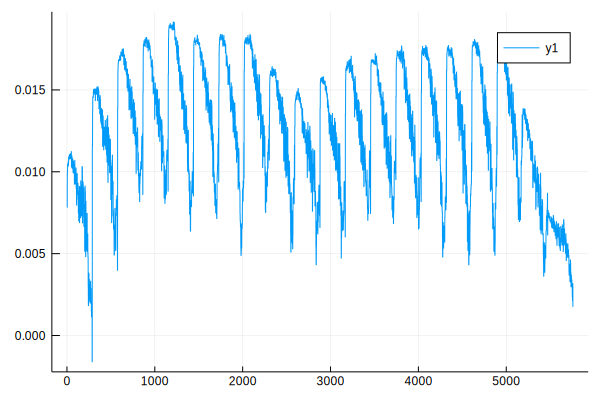

In [36]:
plot(V[:, 1])

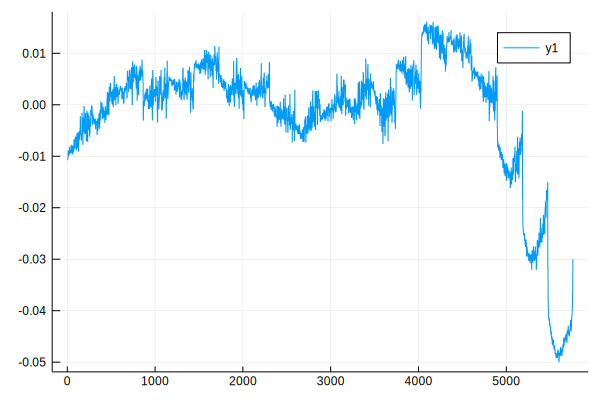

In [37]:
plot(V[:, 2])

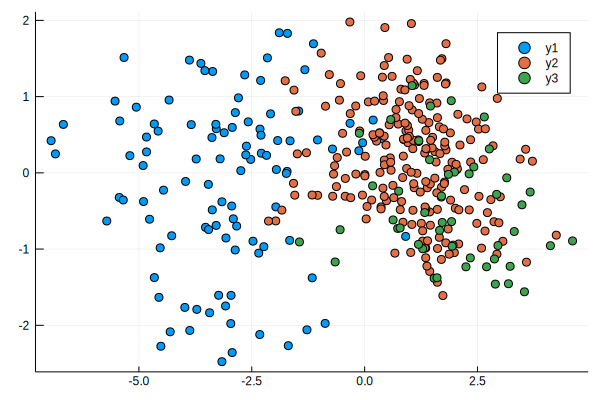

In [38]:
scatter(y1[1:103], y2[1:103])
scatter!(y1[104:104+216-1], y2[104:104+216-1])
scatter!(y1[104+216:size(y1)[1]], y2[104+216:size(y2)[1]])

Things to analyze
-----------------
 - STDEV of v2 - song ending time
 - non-genre feature, but classical tends to have a more varied ending time, while EDM tends to fade out earlier
 - average projection onto v1 - bass amount

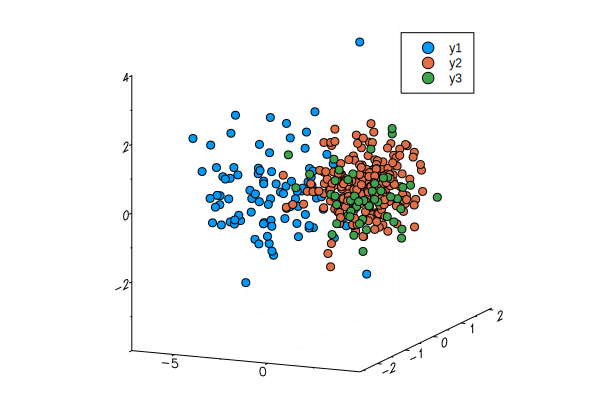

In [39]:
scatter(y1[1:103], y2[1:103], y3[1:103])
scatter!(y1[104:104+216-1], y2[104:104+216-1], y3[104:104+216-1])
scatter!(y1[104+216:size(y1)[1]], y2[104+216:size(y2)[1]], y3[104+216:size(y2)[1]])

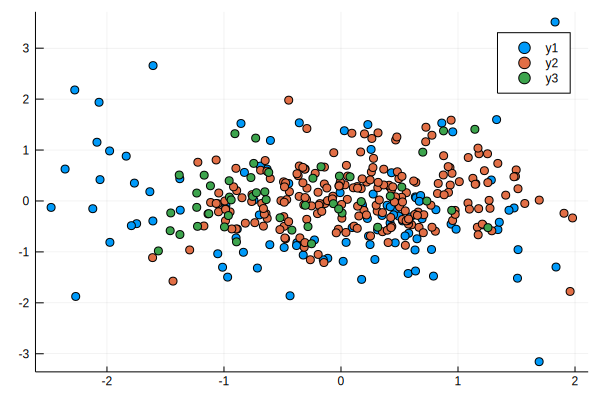

In [40]:
scatter(y2[1:103], y3[1:103])
scatter!(y2[104:104+216-1], y3[104:104+216-1])
scatter!(y2[104+216:size(y2)[1]], y3[104+216:size(y2)[1]])

In [41]:
mean(y1[1:103])

-3.0902860864646042

In [42]:
mean(y1[104:104+216-1])

1.0459699679789447

In [43]:
mean(y1[104+216:size(y1)[1]])

1.9243740379667182

In [44]:
mean(y2[1:103])

-0.1319352016462771

In [45]:
mean(y2[104:104+216-1])

0.16333646823618175

In [46]:
mean(y2[104+216:size(y1)[1]])

-0.45190315353018073

In [47]:
std(y2[1:103])

1.0925490231718333

In [48]:
std(y2[104:104+216-1])

0.7370379662747739

In [49]:
std(y2[104+216:size(y1)[1]])

0.7476712013811345